In [99]:
library(broom)
library(nnet)
library(forcats)
library(stargazer)
library(sjPlot)
library(data.table)


In [72]:
IRdisplay::display_html('<style>.container { width:100% !important; }</style>')


In [61]:
data = read.table('/home/juliame/framing/labeled_data/stats_table_10-21-20.tsv',
                  header=TRUE,
                  sep='\t',
                 )

In [62]:
head(data)

X,Unnamed..0,id_str,year,country,ideology,ideology_norm,libcon_raw,libcon_norm,Capacity.and.Resources,...,num_followers,num_followed,favorites,retweets,log_statuses,num_chars,has_hashtag,has_url,has_mention,is_reply
0,0,1.010559e+18,2018,EU,NA,NA,,,0,...,804,699,NA,NA,7.537963,112,0,0,0,0
1,1,1.054083e+18,2018,EU,2.5308308,1.5823891,conservative,conservative,0,...,3467,4464,NA,NA,7.510978,103,0,1,1,0
2,2,1.025784e+18,2018,EU,-0.2433622,-0.3004766,liberal,liberal,0,...,1783,5002,0,0,12.711087,78,0,1,0,0
3,3,9.704235e+17,2018,EU,NA,NA,,,0,...,15676,9448,0,0,13.112808,81,0,1,0,0
4,4,1.074691e+18,2018,EU,NA,NA,,,0,...,62,195,0,0,9.625162,109,0,1,1,0
5,5,1.057304e+18,2018,EU,2.4930745,1.5567636,conservative,conservative,0,...,902,302,3,0,9.707351,140,0,1,1,1


In [63]:
cols <- cbind(colnames(data))
first <- 10
last <- length(cols) - 10
frames <- cols[first:last]
#metadata <- cbind('log_statuses','num_chars','has_hashtag','has_url','has_mention'))
#data[frames] <- lapply(data[frames],factor)

In [65]:
usdata <- data[data$country=='US', ]
usdf <- cbind(usdata[frames],usdata['log_statuses'],usdata['num_chars'],usdata['has_hashtag'],usdata['has_url'],usdata['has_mention'],usdata['is_reply'])
usdf['year'] = usdata['year']
usdf['ideology'] = usdata['ideology']

usdf$year <- as.factor(usdf$year)
model = lm(ideology ~ ., data = usdf)
#ind_var = 'ideology.tsv'
#path <- '/home/juliame/framing/intermediate_results/'
#filename <- paste(path,ind_var,sep='')
#write.table(df,filename,sep='\t')
stargazer(model,no.space=TRUE,single.row=TRUE,type='text')


                                              Dependent variable:    
                                          ---------------------------
                                                   ideology          
---------------------------------------------------------------------
Capacity.and.Resources                          -0.170 (0.245)       
Crime.and.Punishment                            -0.049 (0.138)       
Cultural.Identity                               -0.005 (0.172)       
Economic                                        -0.268* (0.150)      
Episodic                                         0.044 (0.130)       
External.Regulation.and.Reputation               0.311 (0.284)       
Fairness.and.Equality                            0.217 (0.207)       
Health.and.Safety                              -0.324** (0.144)      
Hero..Cultural.Diversity                       -0.761** (0.315)      
Hero..Integration                               -0.139 (0.364)       
Hero..Worker       

In [66]:
tidy(model)
write.table(tidy(model), "/home/juliame/framing/intermediate_results/predict_ideology_from_frames_10-21.tsv",sep='\t',)

term,estimate,std.error,statistic,p.value
(Intercept),0.543685626,0.472819542,1.14987977,2.505953e-01
Capacity.and.Resources,-0.170039977,0.245300472,-0.69319058,4.884253e-01
Crime.and.Punishment,-0.049150354,0.138018252,-0.35611488,7.218643e-01
Cultural.Identity,-0.004644312,0.171932969,-0.02701234,9.784578e-01
Economic,-0.267601989,0.150018825,-1.78378939,7.490114e-02
Episodic,0.043684243,0.129538787,0.33722906,7.360477e-01
External.Regulation.and.Reputation,0.310626239,0.283929142,1.09402732,2.743281e-01
Fairness.and.Equality,0.217277920,0.207233757,1.04846779,2.947935e-01
Health.and.Safety,-0.324282028,0.144159388,-2.24946867,2.479993e-02
Hero..Cultural.Diversity,-0.761319779,0.315211663,-2.41526526,1.598494e-02


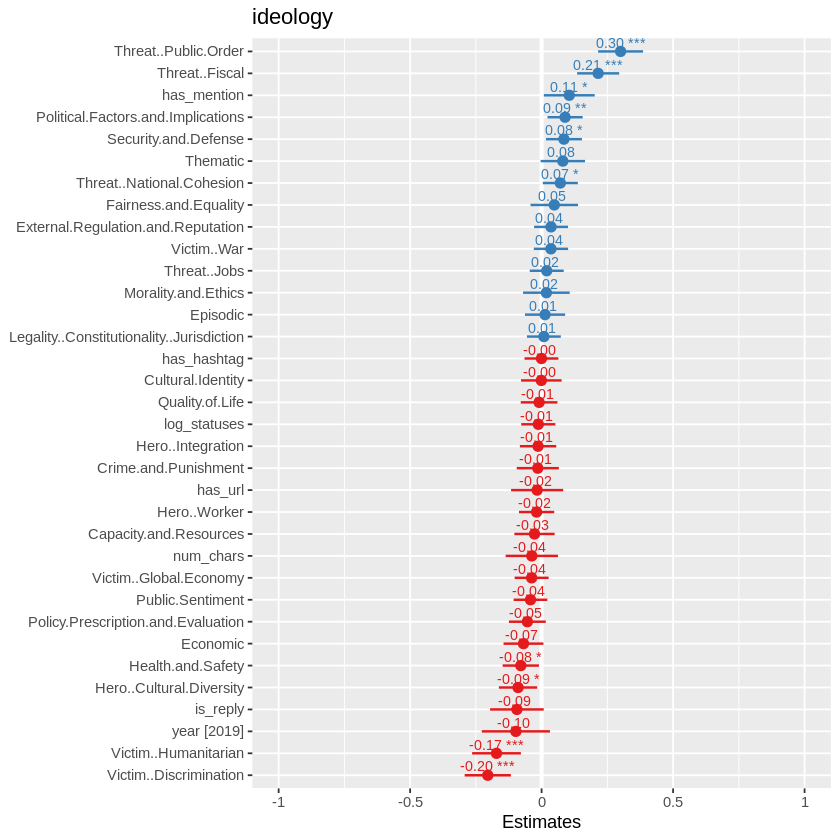

In [71]:
plot_model(model,
          type='std',
          sort.est = TRUE,
          show.values = TRUE,
          value.offset = 0.4,
          value.size=3
          )

In [74]:
df <- data[first:last] 
df <- cbind(df,data['log_statuses'],data['num_chars'],data['has_hashtag'],data['has_url'],data['has_mention'],data['is_reply'])
df['year'] = data['year']
df['country'] = data['country']
df['country'] <- fct_collapse(df$country,
  US = c("US"),
  not_US = c("GB","EU")                            
)

df$year <- as.factor(df$year)
df$country <- relevel(df$country, ref = 'not_US')
model <- glm(country ~ ., data = df,family='binomial')
stargazer(model,no.space=TRUE,single.row=TRUE,title='Frames predictive of US',type='text')


Frames predictive of US
                                              Dependent variable:    
                                          ---------------------------
                                                    country          
---------------------------------------------------------------------
Capacity.and.Resources                          -0.171 (0.174)       
Crime.and.Punishment                           0.877*** (0.111)      
Cultural.Identity                              -0.304*** (0.108)     
Economic                                         0.106 (0.107)       
Episodic                                        0.198** (0.090)      
External.Regulation.and.Reputation             -0.605*** (0.170)     
Fairness.and.Equality                            0.079 (0.157)       
Health.and.Safety                                0.092 (0.105)       
Hero..Cultural.Diversity                       0.717*** (0.206)      
Hero..Integration                                0.305 (0.215)   

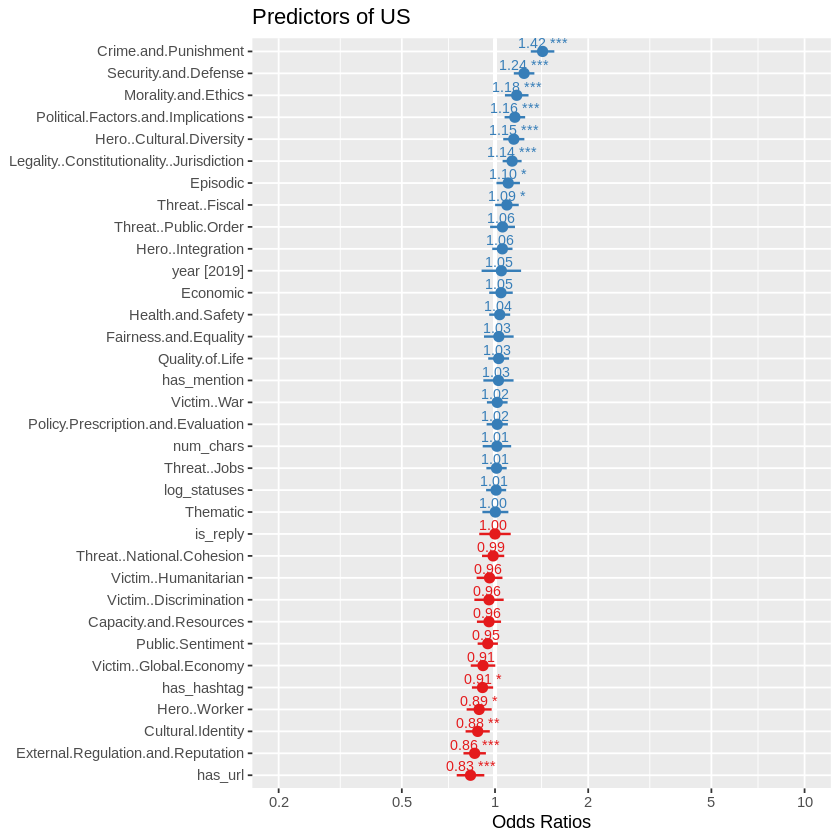

In [75]:
plot_model(model,
          type='std',
          sort.est = TRUE,
           title="Predictors of US",
           show.values = TRUE,
          value.offset = 0.4,
          value.size=3
          )

In [76]:
df <- data[first:last] 
df <- cbind(df,data['log_statuses'],data['num_chars'],data['has_hashtag'],data['has_url'],data['has_mention'],data['is_reply'])
df['year'] = data['year']
df['country'] = data['country']
df['country'] <- fct_collapse(df$country,
  GB = c("GB"),
  not_GB = c("US","EU")                            
)

df$year <- as.factor(df$year)
df$country <- relevel(df$country, ref = 'not_GB')
model <- glm(country ~ ., data = df,family='binomial')
stargazer(model,no.space=TRUE,single.row=TRUE,title='Frames predictive of GB',type='text')


Frames predictive of GB
                                              Dependent variable:    
                                          ---------------------------
                                                    country          
---------------------------------------------------------------------
Capacity.and.Resources                          0.362** (0.159)      
Crime.and.Punishment                           -0.477*** (0.124)     
Cultural.Identity                                0.153 (0.101)       
Economic                                         0.106 (0.103)       
Episodic                                        -0.005 (0.088)       
External.Regulation.and.Reputation               0.169 (0.146)       
Fairness.and.Equality                          0.456*** (0.151)      
Health.and.Safety                                0.107 (0.110)       
Hero..Cultural.Diversity                        -0.199 (0.202)       
Hero..Integration                               -0.128 (0.210)   

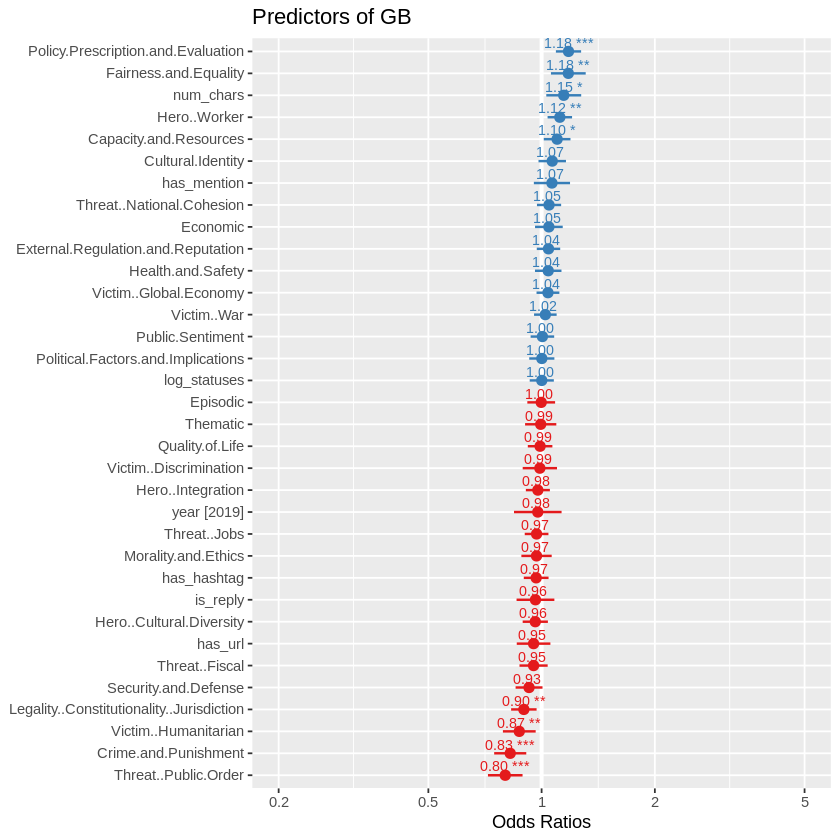

In [77]:
plot_model(model,
          type='std',
          sort.est = TRUE,
           title = 'Predictors of GB',
           show.values = TRUE,
          value.offset = 0.4,
          value.size=3
          )

In [78]:
df <- data[first:last] 
df <- cbind(df,data['log_statuses'],data['num_chars'],data['has_hashtag'],data['has_url'],data['has_mention'],data['is_reply'])
df['year'] = data['year']
df['country'] = data['country']
df['country'] <- fct_collapse(df$country,
  EU = c("EU"),
  not_EU = c("US","GB")                            
)

df$year <- as.factor(df$year)
df$country <- relevel(df$country, ref = 'not_EU')
model <- glm(country ~ ., data = df,family='binomial')
stargazer(model,no.space=TRUE,single.row=TRUE,title='Frames predictive of EU',type='text')


Frames predictive of EU
                                              Dependent variable:    
                                          ---------------------------
                                                    country          
---------------------------------------------------------------------
Capacity.and.Resources                          -0.265 (0.177)       
Crime.and.Punishment                           -0.542*** (0.122)     
Cultural.Identity                                0.120 (0.100)       
Economic                                       -0.215** (0.108)      
Episodic                                        -0.165* (0.087)      
External.Regulation.and.Reputation              0.355** (0.147)      
Fairness.and.Equality                          -0.608*** (0.172)     
Health.and.Safety                               -0.193* (0.109)      
Hero..Cultural.Diversity                       -0.458** (0.206)      
Hero..Integration                               -0.148 (0.211)   

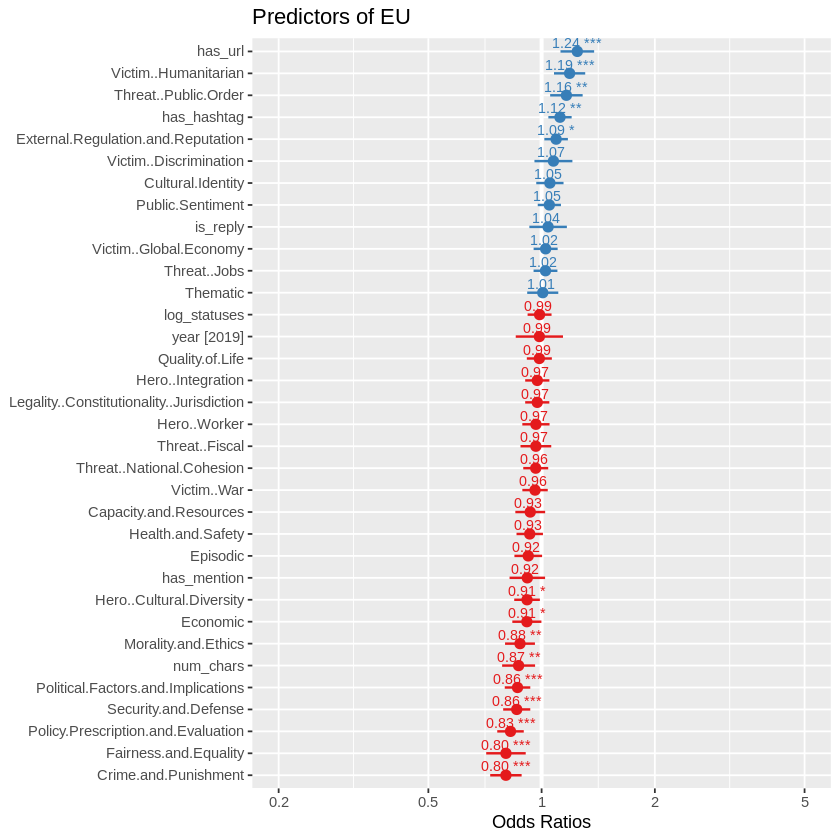

In [79]:
plot_model(model,
          type='std',
          sort.est = TRUE,
           title = 'Predictors of EU',
           show.values = TRUE,
          value.offset = 0.4,
          value.size=3
          )

In [113]:
full_results = data.frame()
for (i in 1:length(frames)) {
    df <- subset(data, select = c(frames[i],"country","year"))
    colnames(df)[1] <- "y"
    df$year <- as.factor(df$year)
    df$country <- relevel(df$country, ref = 'US')
    df <- cbind(df,data['log_statuses'],data['num_chars'],data['has_hashtag'],data['has_url'],data['has_mention'],data['is_reply'])
    df['log_followers'] = log(data['num_followers']+1)
    df['log_followed'] = log(data['num_followed']+1)
    model <- glm(y ~ ., data = df,family='binomial')
    res <- tidy(model)
    res$frame <- frames[i]
    full_results <- rbind(full_results,res[res$term %like% "country", ])
   }
write.table(full_results, "/home/juliame/framing/intermediate_results/predict_frame_from_country_10-21.tsv",sep='\t',)

In [114]:
full_results = data.frame()

for (i in 1:length(frames)) { 
    df <- subset(usdata, select = c(frames[i],"ideology","year"))
    colnames(df)[1] <- "y"
    df$year <- as.factor(df$year)
    df <- cbind(df,usdata['log_statuses'],usdata['num_chars'],usdata['has_hashtag'],usdata['has_url'],usdata['has_mention'],usdata['is_reply'])
    df['log_followers'] = log(usdata['num_followers']+1)
    df['log_followed'] = log(usdata['num_followed']+1)
    model <- glm(y ~ ., data=df, family=binomial)
    res <- tidy(model)
    res <- res[with(res, order(p.value)), ]
#     stargazer(model,no.space=TRUE,single.row=TRUE,title=frames[i],type='text',omit.stat='all')
    res <- tidy(model)
    res$frame <- frames[i]
    full_results <- rbind(full_results,res[res$term %like% "ideology", ])
    }
full_results
write.table(full_results, "/home/juliame/framing/intermediate_results/predict_frame_from_ideology_10-21.tsv",sep='\t',)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

term,estimate,std.error,statistic,p.value,frame
ideology,0.260709928,0.09248692,2.8188843,4.819088e-03,Capacity.and.Resources
ideology,0.173531759,0.04966756,3.4938649,4.760819e-04,Crime.and.Punishment
ideology,-0.074339534,0.06643651,-1.1189560,2.631589e-01,Cultural.Identity
ideology,0.014903978,0.05868878,0.2539494,7.995347e-01,Economic
ideology,-0.086152662,0.04933752,-1.7461897,8.077799e-02,Episodic
ideology,0.214642378,0.12351983,1.7377159,8.226088e-02,External.Regulation.and.Reputation
ideology,-0.171125702,0.07136395,-2.3979292,1.648805e-02,Fairness.and.Equality
ideology,-0.111433410,0.06144574,-1.8135255,6.975082e-02,Health.and.Safety
ideology,-0.567233270,0.18382054,-3.0857992,2.030059e-03,Hero..Cultural.Diversity
ideology,-0.142720875,0.16729890,-0.8530892,3.936099e-01,Hero..Integration


In [124]:
for (i in 1:length(frames)) { 
    ind_var = frames[i]
    path <- '/home/juliame/framing/intermediate_results/'
    filename <- paste(path,ind_var,'_ideology.tsv',sep='')
    df <- subset(usdata, select = c(frames[i],"ideology","year"))
    colnames(df)[1] <- "y"
    model <- glm(y ~ ideology + year, data=df, family=binomial)
    res <- tidy(model)
    res <- res[with(res, order(p.value)), ]
    write.table(res,filename,sep='\t')
    }

In [91]:
df <- data[first:last] 
df <- cbind(df,data['log_statuses'],data['num_chars'],data['has_hashtag'],data['has_url'],data['has_mention'],data['is_reply'])
df['year'] = data['year']
df['ideology'] = data['ideology']
df['country'] = data['country']
df['log_favorites'] = log(data['favorites']+1)
df['log_followers'] = log(data['num_followers']+1)
df['log_followed'] = log(data['num_followed']+1)
df$year <- as.factor(df$year)
fav_model <- lm(log_favorites ~ ., data = df)
stargazer(fav_model,no.space=TRUE,single.row=TRUE,title='Frames predictive of log favorites',type='text')


Frames predictive of log favorites
                                              Dependent variable:    
                                          ---------------------------
                                                 log_favorites       
---------------------------------------------------------------------
Capacity.and.Resources                          0.253** (0.119)      
Crime.and.Punishment                            -0.005 (0.076)       
Cultural.Identity                                0.073 (0.079)       
Economic                                        0.123* (0.073)       
Episodic                                        -0.014 (0.065)       
External.Regulation.and.Reputation              -0.069 (0.106)       
Fairness.and.Equality                          0.276*** (0.105)      
Health.and.Safety                               -0.042 (0.075)       
Hero..Cultural.Diversity                        -0.084 (0.148)       
Hero..Integration                               0.310*

In [92]:
df <- data[first:last] 
df <- cbind(df,data['log_statuses'],data['num_chars'],data['has_hashtag'],data['has_url'],data['has_mention'],data['is_reply'])
df['year'] = data['year']
df['ideology'] = data['ideology']
df['country'] = data['country']
df['log_followers'] = log(data['num_followers']+1)
df['log_followed'] = log(data['num_followed']+1)
df['log_retweets'] = log(data['retweets']+1)
df$year <- as.factor(df$year)
rt_model <- lm(log_retweets ~ ., data = df)
stargazer(rt_model,no.space=TRUE,single.row=TRUE,title='Frames predictive of log retweets',type='text')


Frames predictive of log retweets
                                              Dependent variable:    
                                          ---------------------------
                                                 log_retweets        
---------------------------------------------------------------------
Capacity.and.Resources                         0.269*** (0.081)      
Crime.and.Punishment                             0.028 (0.052)       
Cultural.Identity                                0.069 (0.054)       
Economic                                         0.076 (0.049)       
Episodic                                         0.025 (0.045)       
External.Regulation.and.Reputation               0.067 (0.072)       
Fairness.and.Equality                            0.044 (0.072)       
Health.and.Safety                               -0.019 (0.051)       
Hero..Cultural.Diversity                        -0.101 (0.101)       
Hero..Integration                               -0.085 

In [187]:
colnames(data)

[1] "X"                                        
 [2] "id_str"                                   
 [3] "year"                                     
 [4] "country"                                  
 [5] "ideology"                                 
 [6] "ideology_norm"                            
 [7] "libcon_raw"                               
 [8] "libcon_norm"                              
 [9] "Capacity.and.Resources"                   
[10] "Crime.and.Punishment"                     
[11] "Cultural.Identity"                        
[12] "Economic"                                 
[13] "Episodic"                                 
[14] "External.Regulation.and.Reputation"       
[15] "Fairness.and.Equality"                    
[16] "Health.and.Safety"                        
[17] "Hero..Cultural.Diversity"                 
[18] "Hero..Integration"                        
[19] "Hero..Worker"                             
[20] "Legality..Constitutionality..Jurisdiction"
[21] "Morality.and.Ethics"                      
[22] "Policy.Prescription.and.Evaluation"       
[23] "Political.Factors.and.Implications"       
[24] "Public.Sentiment"                         
[25] "Quality.of.Life"                          
[26] "Security.and.Defense"                     
[27] "Thematic"                                 
[28] "Threat..Fiscal"                           
[29] "Threat..Jobs"                             
[30] "Threat..National.Cohesion"                
[31] "Threat..Public.Order"                     
[32] "Victim..Discrimination"                   
[33] "Victim..Global.Economy"                   
[34] "Victim..Humanitarian"                     
[35] "Victim..War"                              
[36] "emigrant"                                 
[37] "emigration"                               
[38] "illegal.alien"                            
[39] "illegal.immigrant"                        
[40] "illegal.immigration"                      
[41] "illegals"                                 
[42] "immigrant"                                
[43] "immigration"                              
[44] "mass.immigration"                         
[45] "mass.migration"                           
[46] "migrant"                                  
[47] "migration"                                
[48] "undocumented"                             
[49] "num_followers"                            
[50] "num_followed"                             
[51] "favorites"                                
[52] "retweets"

In [93]:
stargazer(rt_model, fav_model,type='text',no.space=TRUE,single.row=TRUE)


                                                  Dependent variable:        
                                          -----------------------------------
                                            log_retweets      log_favorites  
                                                 (1)               (2)       
-----------------------------------------------------------------------------
Capacity.and.Resources                    0.269*** (0.081)   0.253** (0.119) 
Crime.and.Punishment                        0.028 (0.052)    -0.005 (0.076)  
Cultural.Identity                           0.069 (0.054)     0.073 (0.079)  
Economic                                    0.076 (0.049)    0.123* (0.073)  
Episodic                                    0.025 (0.045)    -0.014 (0.065)  
External.Regulation.and.Reputation          0.067 (0.072)    -0.069 (0.106)  
Fairness.and.Equality                       0.044 (0.072)   0.276*** (0.105) 
Health.and.Safety                          -0.019 (0.051)    -0

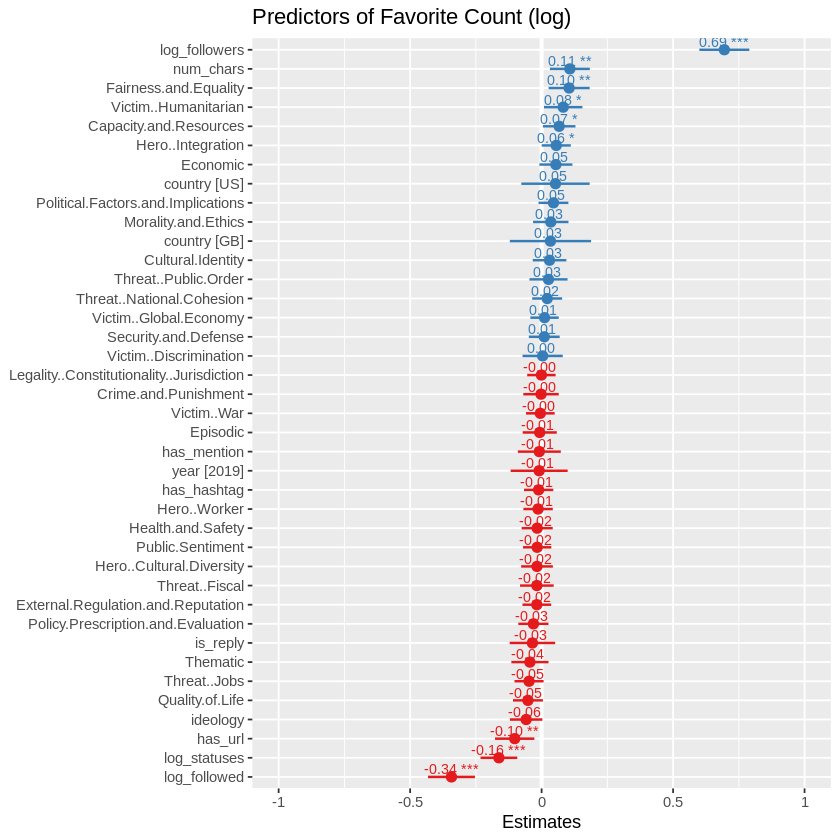

In [94]:
plot_model(fav_model,
          type='std',
          sort.est = TRUE,
           title = 'Predictors of Favorite Count (log)',
           show.values=TRUE,
            value.offset = 0.4,
          value.size=3
           
          )

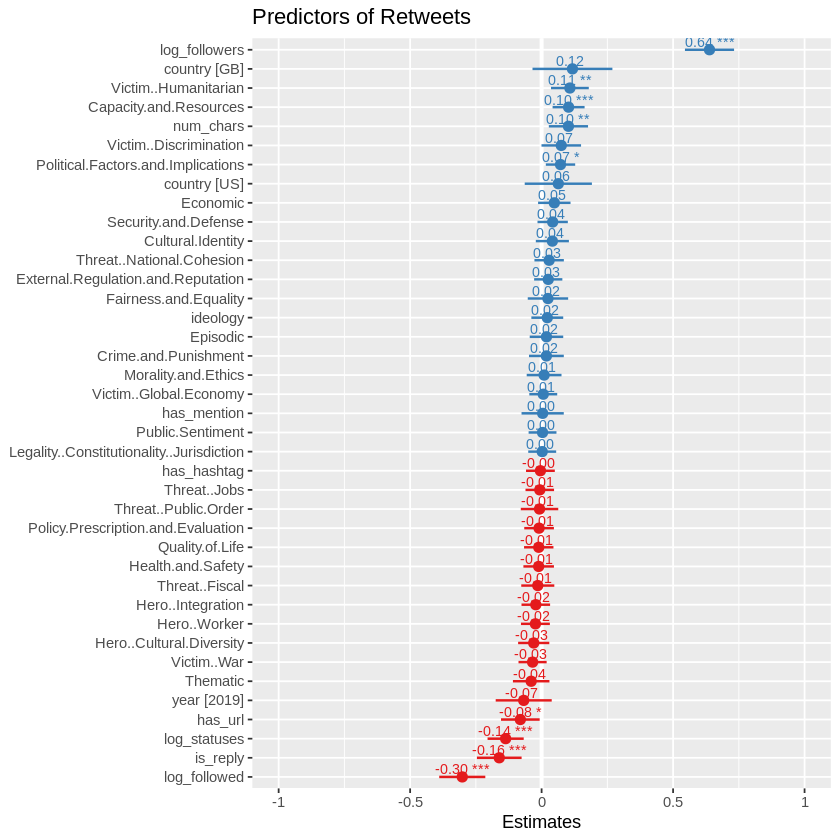

In [95]:
plot_model(rt_model,
          type='std',
          sort.est = TRUE,
           title = 'Predictors of Retweets',
           show.values=TRUE,
            value.offset = 0.4,
          value.size=3
          )